In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [12]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df['mean score'] = ((df['math score']+df['reading score']+ df['writing score'])/3).round()
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [17]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
5,0,1,0,1,1,71,83,78,77.0
6,0,1,4,1,0,88,95,92,92.0
7,1,1,4,0,1,40,43,39,41.0
8,1,3,2,0,0,64,64,67,65.0
9,0,1,2,0,1,38,60,50,49.0


<Axes: xlabel='gender', ylabel='count'>

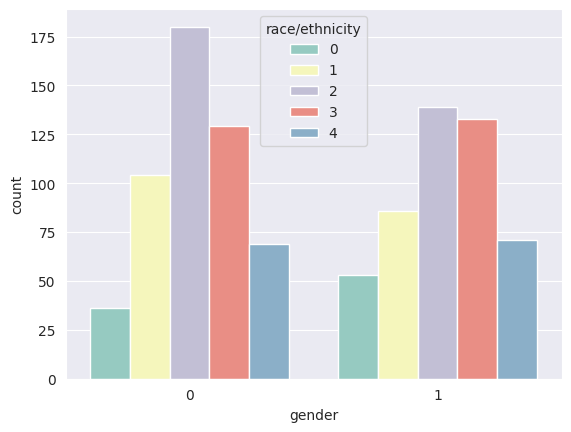

In [22]:
sns.countplot(x = df['gender'], hue = df['race/ethnicity'])

# 1 --- male
# 2 --- female

In [26]:
df['test preparation course'].value_counts()

# 1 -- none
# 0 -- completed

test preparation course
1    642
0    358
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f99bb59c2b0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

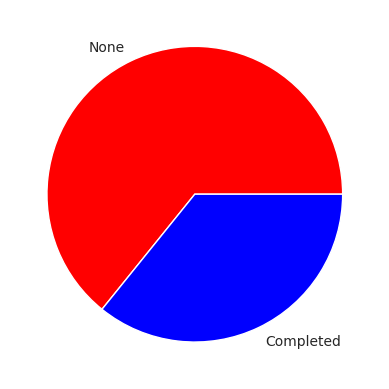

In [27]:
labels = ['None','Completed']
colors = ['Red','Blue']
plt.pie(df['test preparation course'].value_counts(),labels = labels, colors = colors)

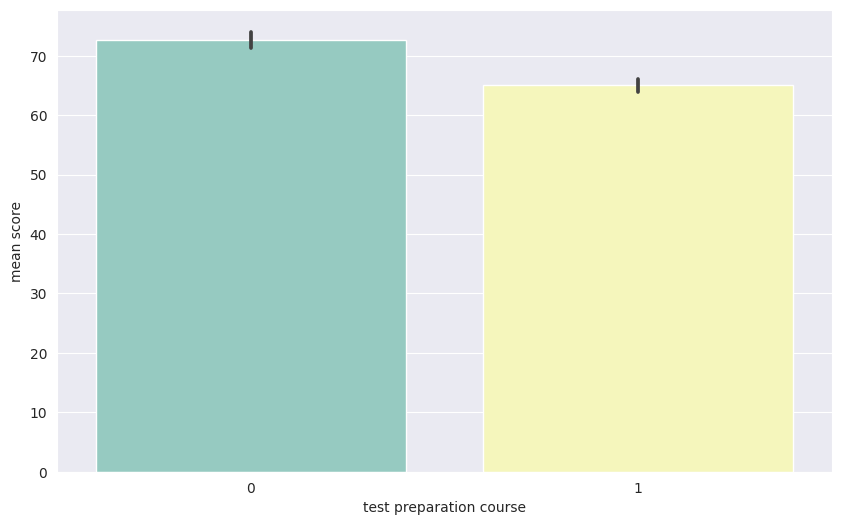

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'test preparation course', y = 'mean score', data = df)
plt.show()

<Axes: xlabel='lunch', ylabel='mean score'>

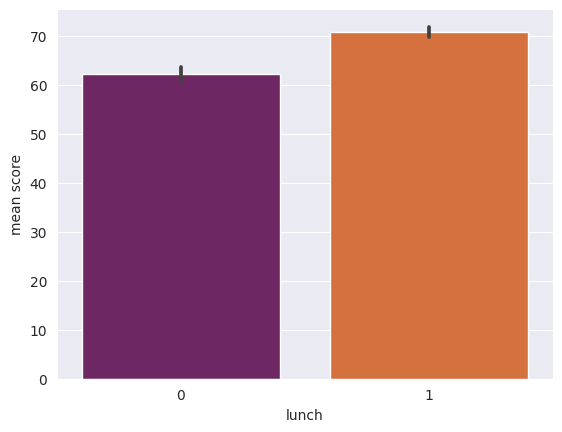

In [30]:
sns.barplot(x = df['lunch'], y = df['mean score'], data = df, palette = 'inferno')

# 0 -- free lunch
# 1 -- tiffin , home

<Axes: xlabel='parental level of education', ylabel='mean score'>

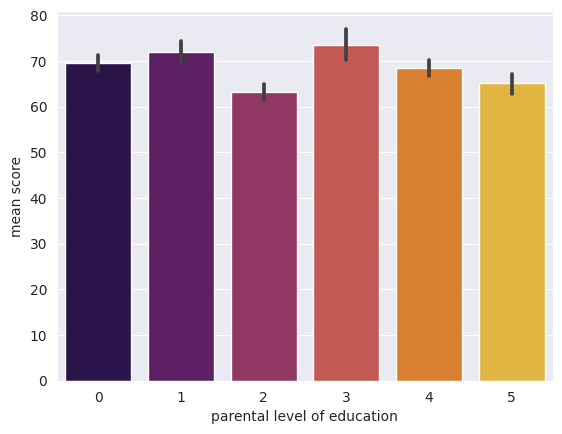

In [31]:
sns.barplot(x = df['parental level of education'], y = df['mean score'], data = df, palette = 'inferno')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 2000x2000 with 0 Axes>

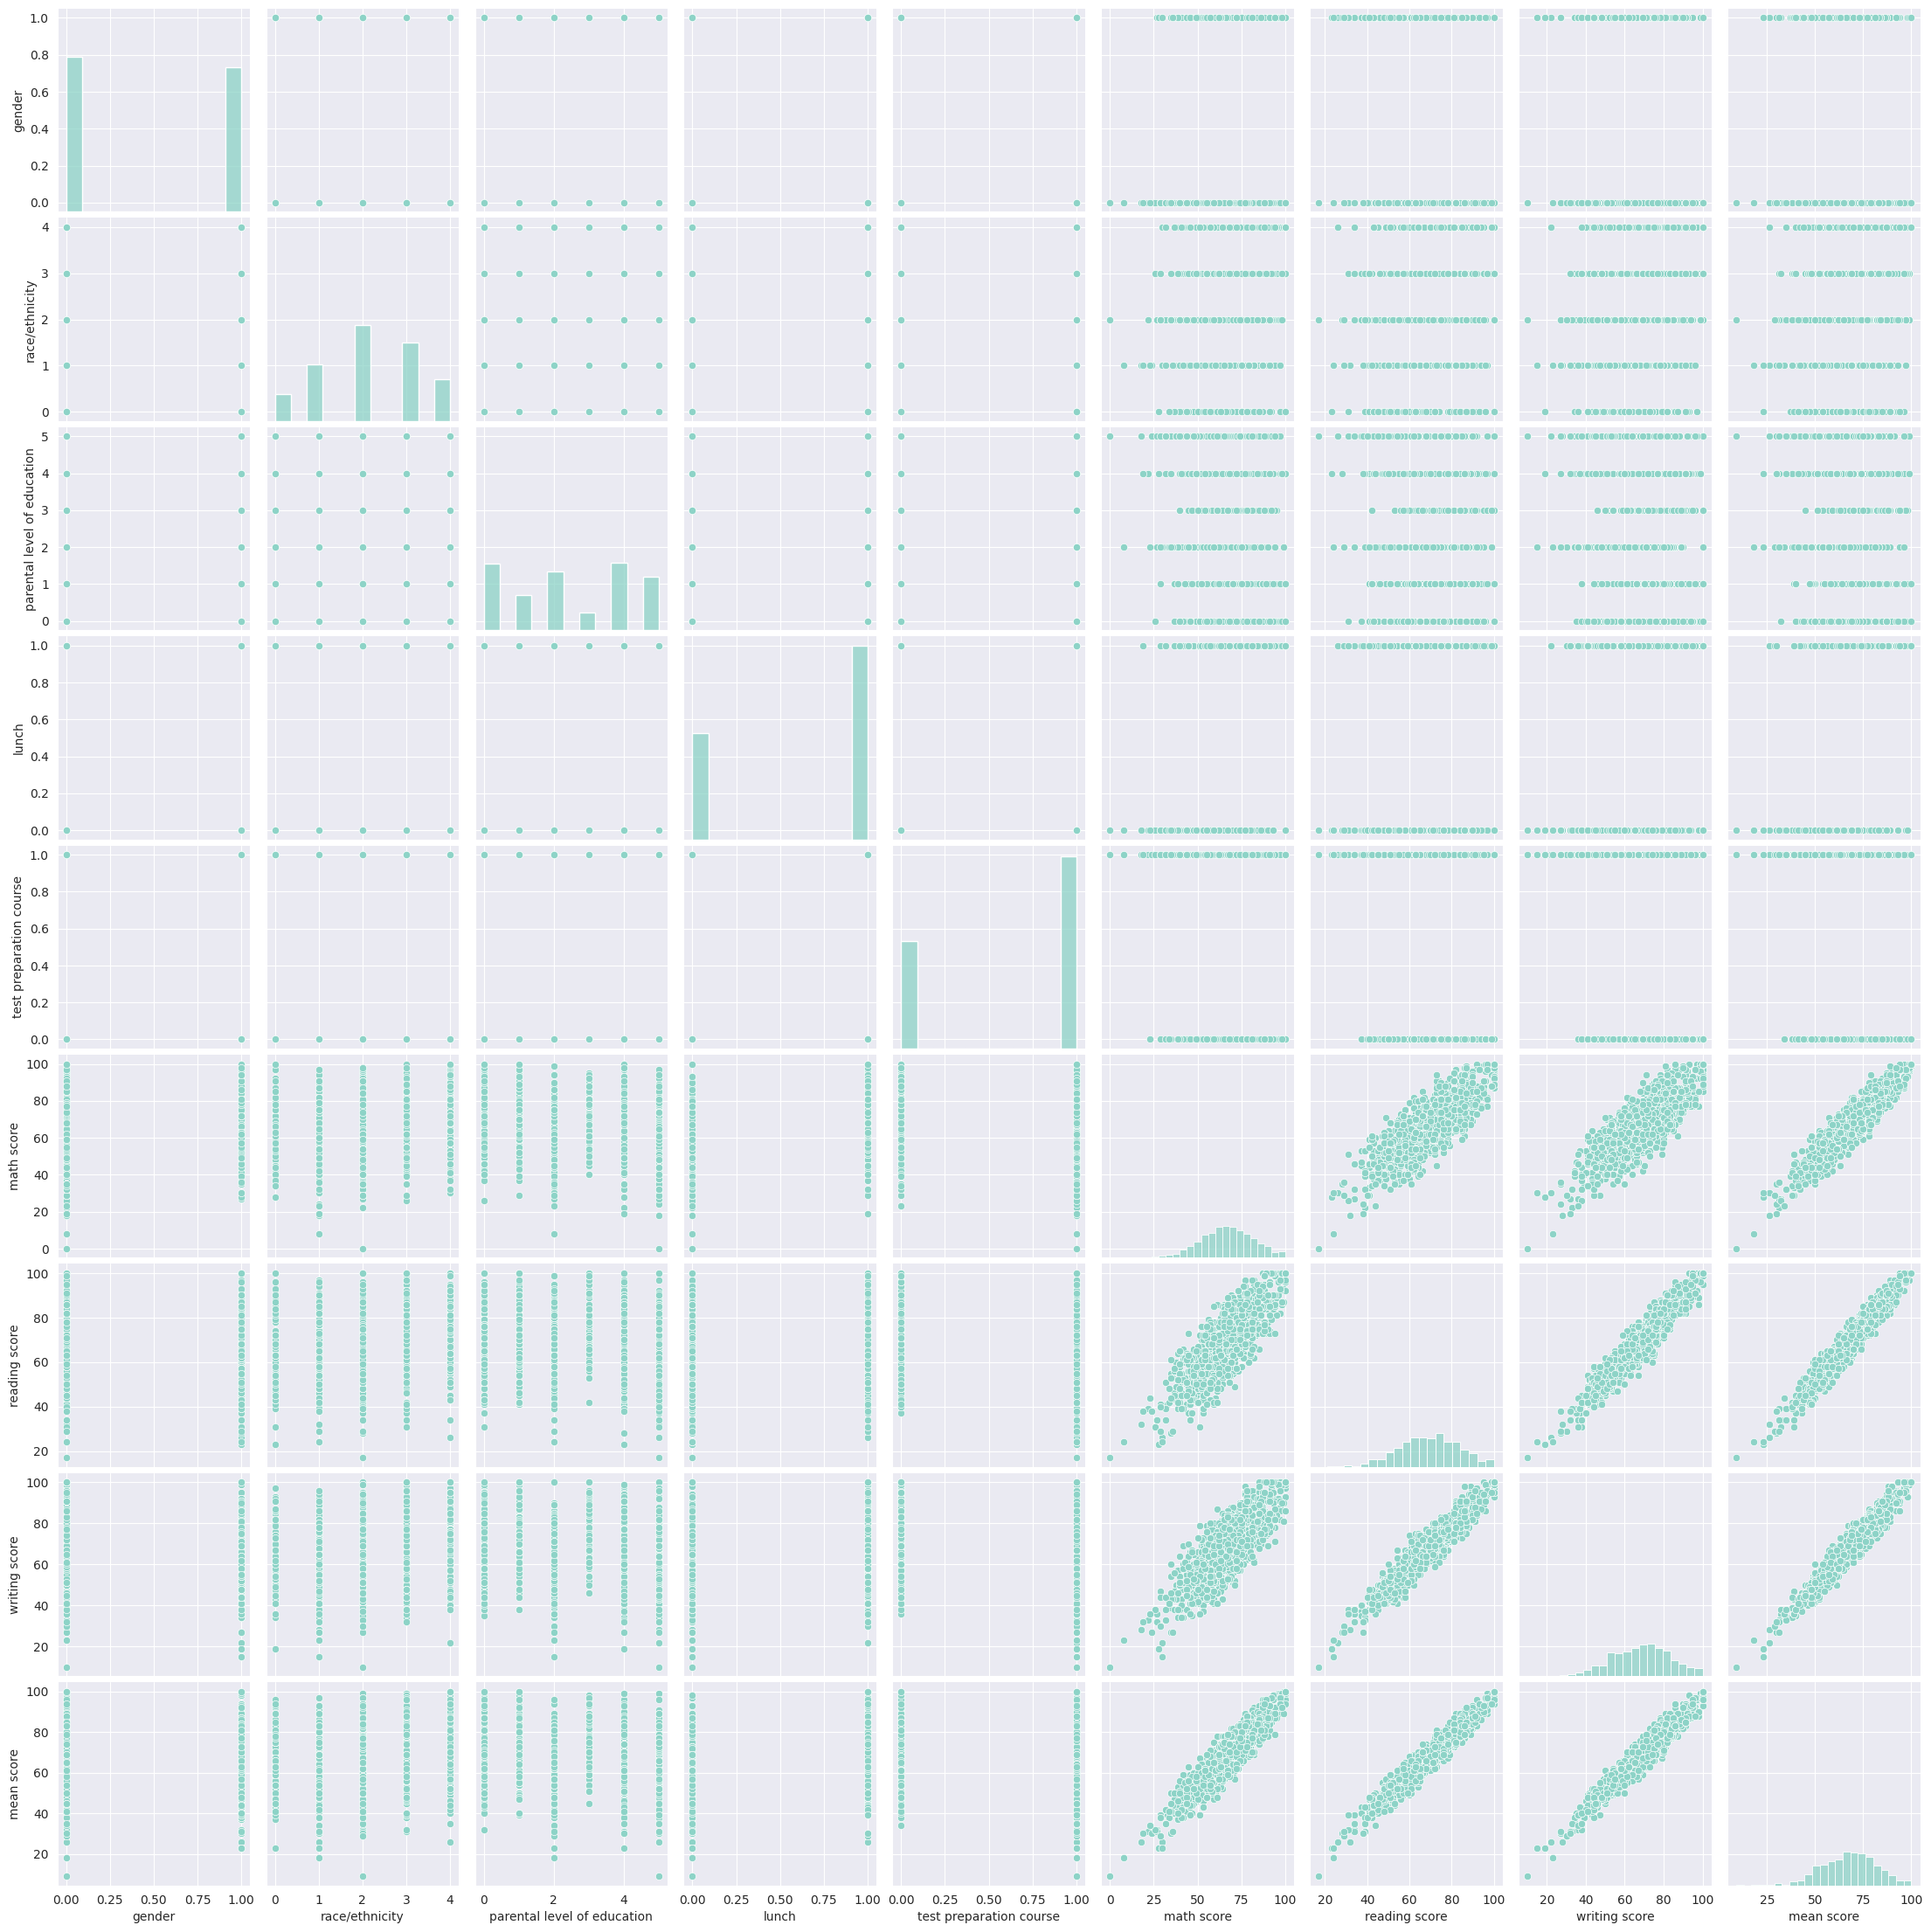

In [34]:
plt.figure(figsize = (20,20))
sns.pairplot(df)
plt.show()

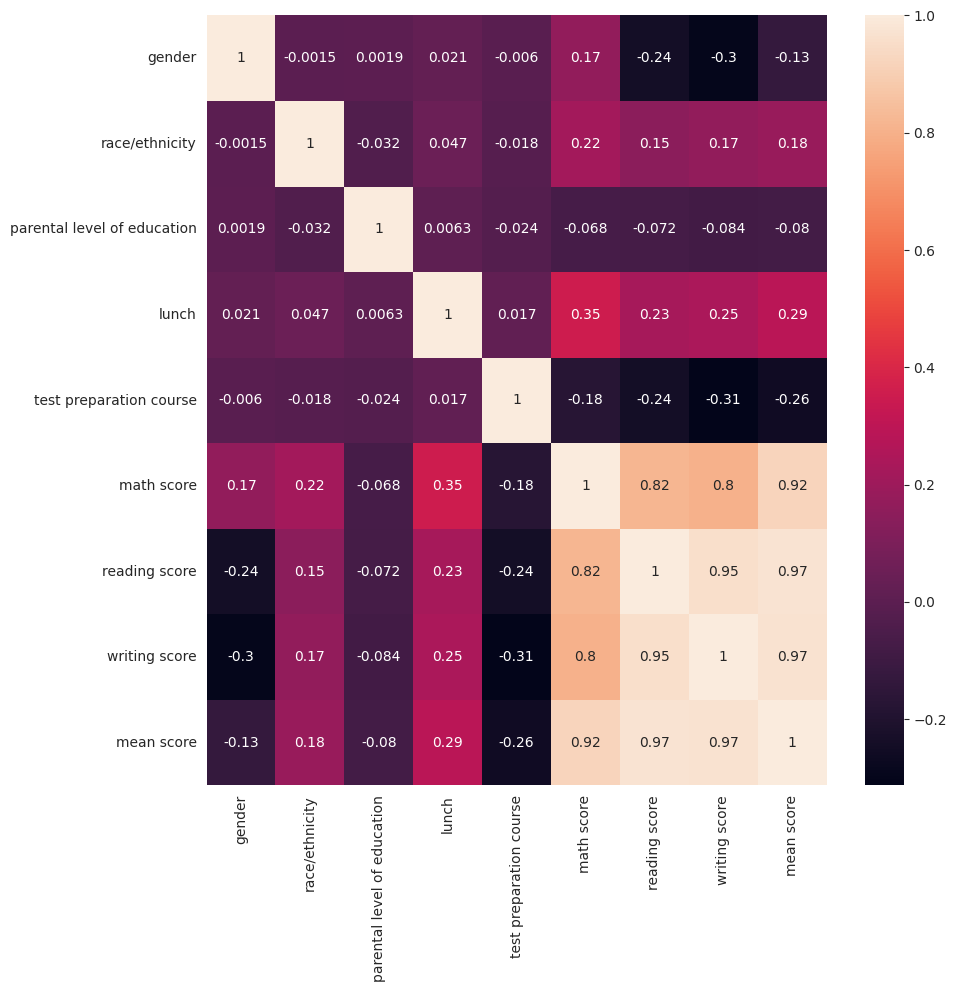

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [37]:
df = df.drop(['math score', 'writing score','reading score'], axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [38]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [44]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [45]:
LogisticRegression(random_state = 0, solver = 'liblinear')

LogisticRegression(random_state=0, solver='liblinear')

In [46]:
predictions = model.predict(x_test)

In [47]:
predictions

array([69., 56., 56., 59., 73., 76., 67., 71., 76., 69., 73., 54., 69.,
       71., 76., 54., 68., 74., 62., 49., 73., 69., 67., 68., 71., 56.,
       55., 68., 54., 74., 59., 76., 67., 73., 76., 71., 74., 68., 92.,
       69., 73., 56., 68., 75., 65., 92., 73., 65., 74., 54., 71., 55.,
       65., 68., 71., 69., 69., 69., 76., 69., 71., 74., 76., 71., 73.,
       58., 69., 73., 76., 68., 71., 71., 71., 75., 71., 71., 69., 69.,
       73., 73., 76., 69., 87., 73., 79., 69., 71., 92., 76., 54., 54.,
       73., 54., 55., 69., 68., 59., 54., 56., 68., 76., 71., 61., 50.,
       71., 75., 76., 65., 69., 79., 74., 75., 69., 59., 74., 74., 76.,
       59., 56., 76., 69., 65., 74., 68., 71., 76., 73., 76., 76., 74.,
       79., 73., 59., 69., 76., 69., 71., 69., 69., 73., 71., 73., 73.,
       68., 65., 59., 59., 59., 76., 69., 68., 74., 74., 71., 74., 69.,
       71., 73., 69., 68., 74., 69., 59., 71., 76., 73., 76., 68., 69.,
       73., 69., 71., 65., 75., 73., 69., 69., 73., 87., 73., 68

In [48]:
y_test

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
679    61.0
722    84.0
215    81.0
653    70.0
150    66.0
Name: mean score, Length: 200, dtype: float64

In [50]:
diff = abs(predictions - y_test)

In [51]:
diff.mean()

11.03